In [14]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,100000
N = 100
C = 0.95
dim = 1
N_d = N*dim
maxtau = int(N * 1.7 )
taus = np.arange(1,maxtau)

torch.manual_seed(0)
torch.manual_seed(111)

u_asym = torch.rand(dim, Two + Ttrain)
#u_sym = u_asym
u_sym = 2 * u_asym - 1

esn = ESN.ESN_mult(N_d, uC=C, dim=dim)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity")
print("runtime :",time.time()-st)

st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_sur=True)
mfs1,raw_res,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,raw_mfs=True,rev_method=False)
print("calc time :",time.time()-st)

st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_with_surrogate(u_sym, Xwo, maxtau,sur_samples=10)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
mfs2 = ESN.MC_cSVD(u_sym, Xwo, maxtau,rev_method = True)
print("calc time :",time.time()-st)


totMC1 = torch.sum(mfs1).cpu().numpy()
totMC2 = torch.sum(mfs2).cpu().numpy()

#colors = ["r", "g", "b", "c", "m", "y","pink","lime"]
print(f"totMC1:{totMC1}\ntotMC2:{totMC2}\nsurrogate value: {sur_val.cpu().numpy()}")

#print(f"totMC:{totMC}")

runtime : 4.968511581420898
calc time : 0.051328182220458984
calc time : 0.059481143951416016
totMC1:99.99492037141506
totMC2:99.99552461623024
surrogate value: [0.00099999]


0.003190005056926366


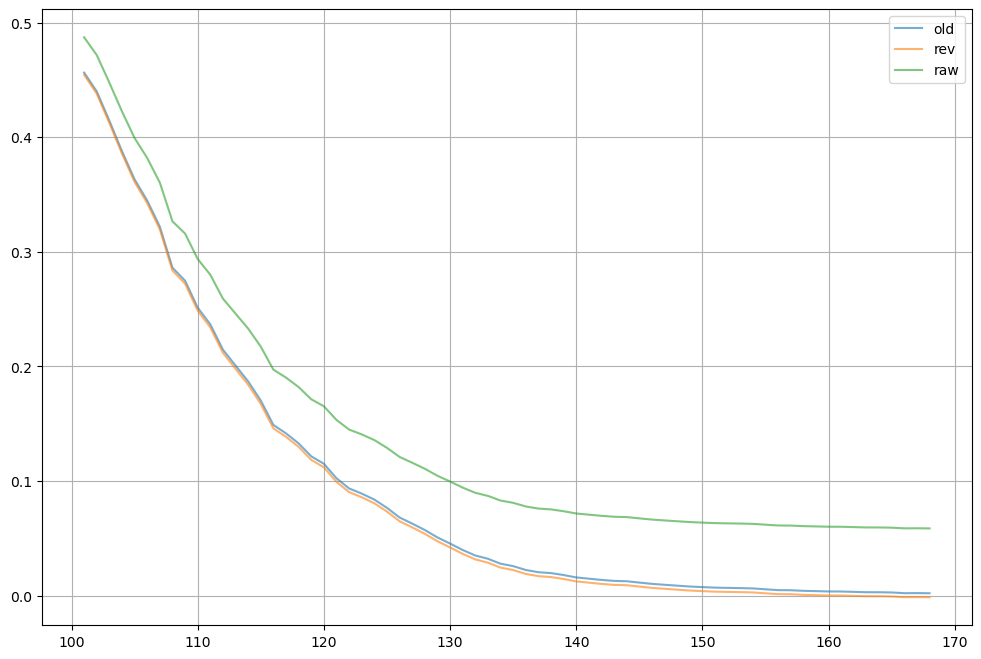

In [2]:
st,end=100,-1

fig,ax = plt.subplots(figsize=(12,8))
plt.plot(taus[st:end],mfs1[0][st:end].cpu().numpy(),alpha=0.6,label="old")
plt.plot(taus[st:end],mfs2[0][st:end].cpu().numpy(),alpha=0.6,label="rev")
plt.plot(taus[st:end],raw_res[0][st:end].cpu().numpy(),alpha=0.6,label="raw")
plt.legend()
plt.grid(True)
print(torch.mean(mfs1[0][st:end]-mfs2[0][st:end]).cpu().numpy())


nan


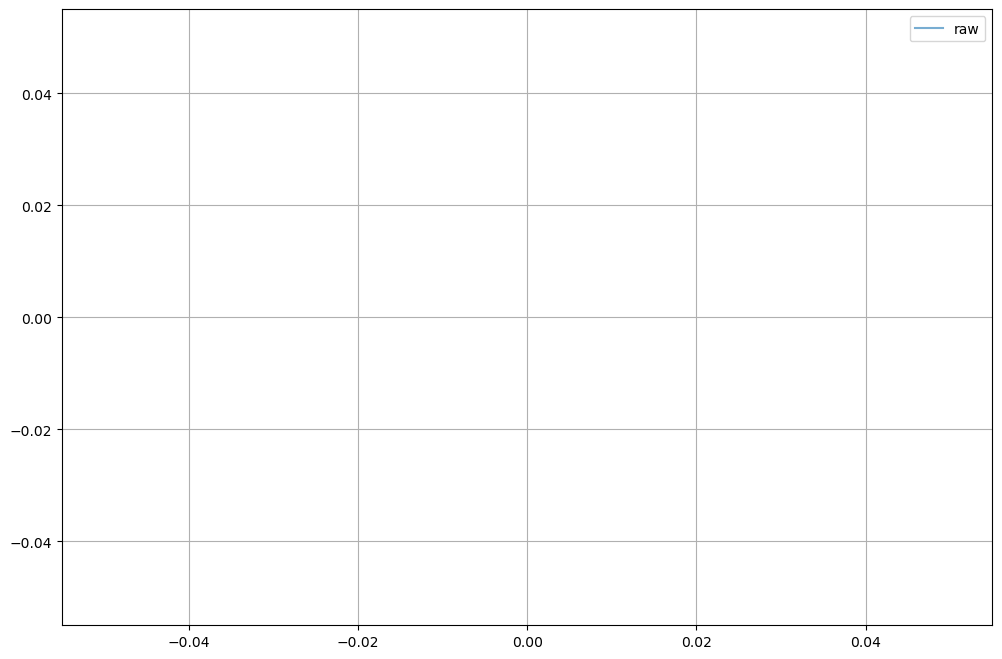

In [3]:
st,end=480,620

fig,ax = plt.subplots(figsize=(12,8))
plt.plot(taus[st:end],raw_res[0][st:end].cpu().numpy(),alpha=0.6,label="raw")
plt.legend()
plt.grid(True)
print(torch.mean(mfs1[0][st:end]-mfs2[0][st:end]).cpu().numpy())


totMC_raw: 3124.4035132517947


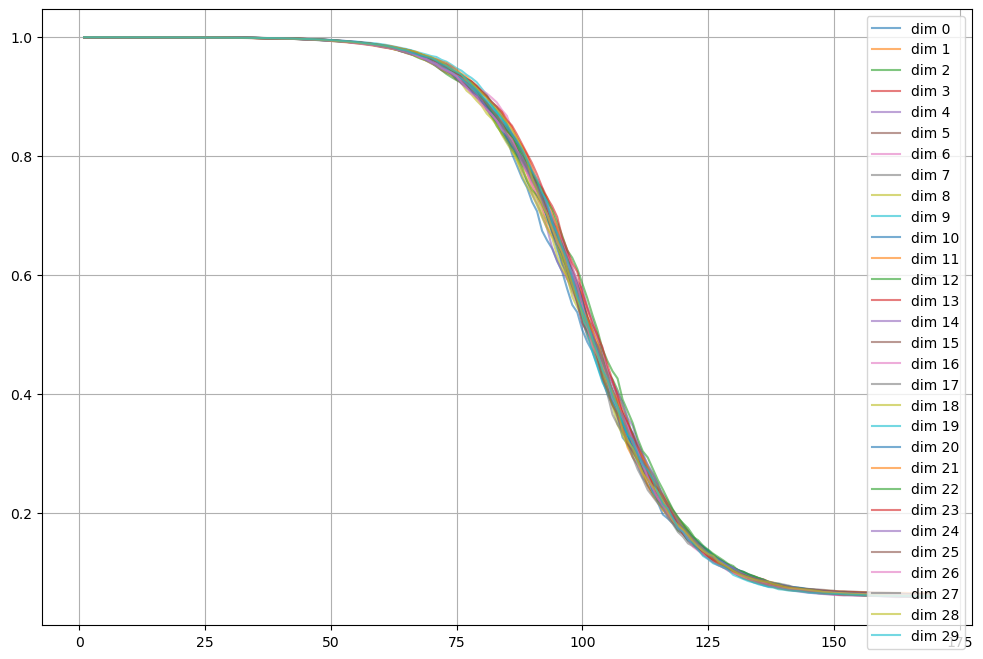

In [4]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 900
for d in range(dim):
    plt.plot(taus[:tau_end],raw_res[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totrawMC = torch.sum(raw_res[:,:tau_end]).cpu().numpy()
print("totMC_raw:",totrawMC)
#
plt.legend()
plt.grid(True)

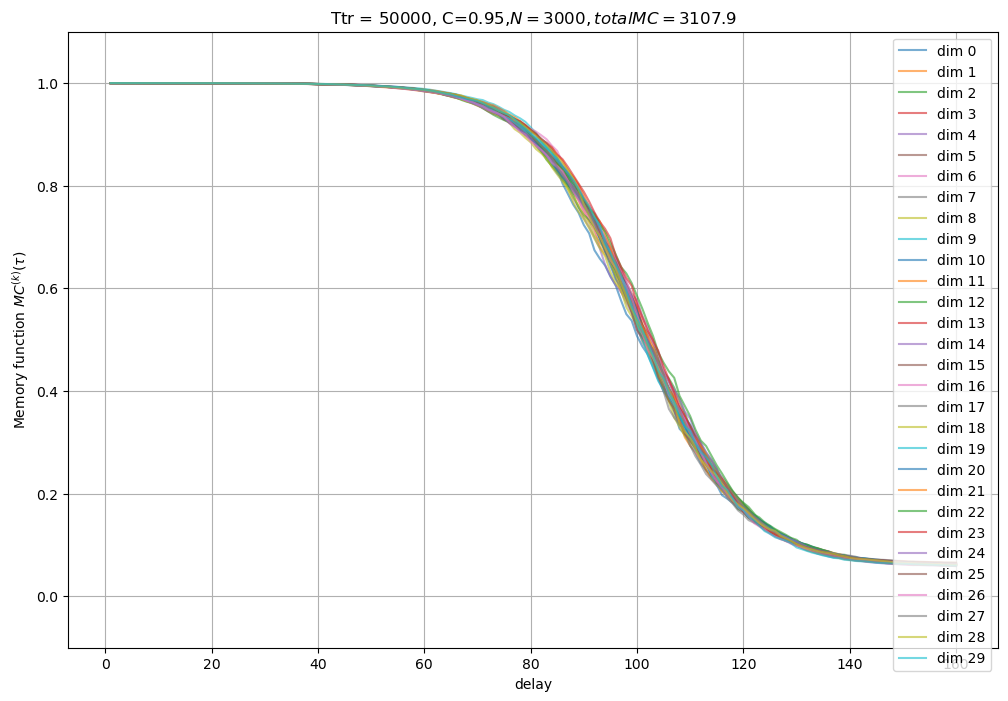

In [5]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 160
for d in range(dim):
    plt.plot(taus[:tau_end],raw_res[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totrawMC = torch.sum(raw_res[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totrawMC))
#
plt.legend()
plt.grid(True)

NameError: name 'mfs' is not defined

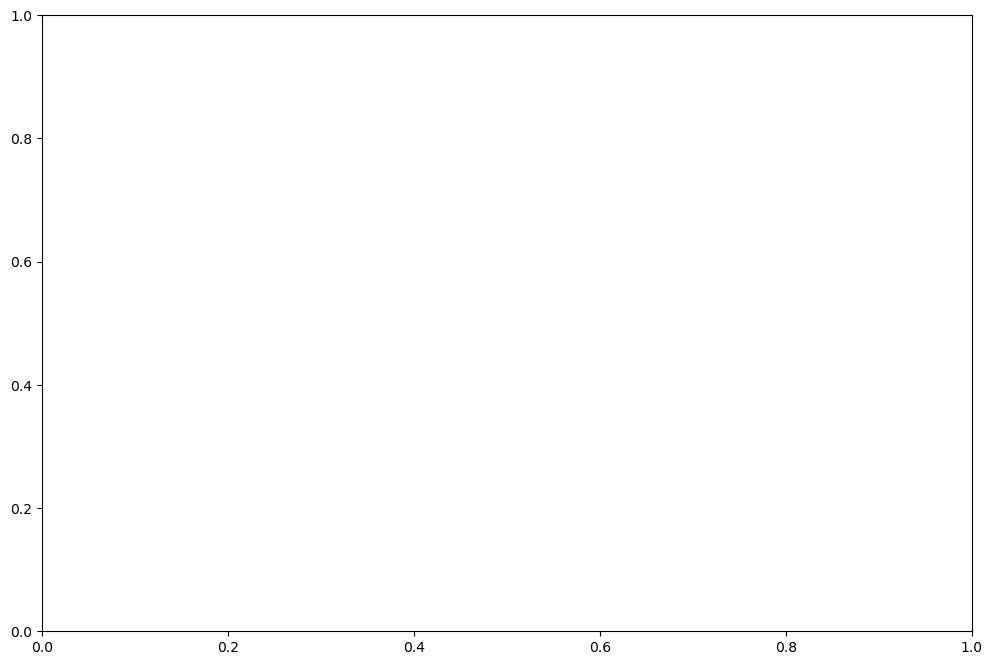

In [6]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 160
for d in range(dim):
    plt.plot(taus[:tau_end],mfs[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totMC = torch.sum(mfs[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

In [ ]:
""""""
st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_with_surrogate(u_sym, Xwo, maxtau,sur_samples=10)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
mfs = ESN.MC_cSVD(u_sym, Xwo, maxtau)
print("calc time :",time.time()-st)

totMC = torch.sum(mfs).cpu().numpy()

print(totMC)

taus = np.arange(1,maxtau)
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
    
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
plt.legend()
plt.grid(True)


In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

tau_st =200 
for d in range(dim):
    plt.plot(taus[tau_st:],mfs[d][tau_st:].cpu().numpy(),alpha=0.6,label="dim "+str(d))

print(torch.mean(raw_res[:,tau_st:]).cpu().numpy())
print(torch.mean(mfs[:,tau_st:]).cpu().numpy())


plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

In [ ]:
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(12,8))

for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=3)

plt.ylim(-0.1,1.1)
#plt.xlabel("delay")
#plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
#plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
plt.legend()
plt.grid(True)